In [118]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from sklearn.metrics import average_precision_score

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import remove_stopwords
import sklearn as sk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Tfidv = TfidfVectorizer()
bow_vectorizer = CountVectorizer()

ps = PorterStemmer()
#df_short=fn.shrinker(1,1000,df)
  # np.set_printoptions(threshold=fn.np.inf)         #show all the array
  # pd_set_df_view_options(max_rows=10000, max_columns=20, display_width=320) #show all the dataframe
  # for pycharm only
from scipy.spatial.distance import cosine
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [119]:
def pd_set_df_view_options(max_rows, max_columns, display_width):

    # Show more than 10 or 20 rows when a dataframe comes back.
    pd.set_option('display.max_rows', max_rows)
    # Columns displayed in debug view
    pd.set_option('display.max_columns', max_columns)

    pd.set_option('display.width', display_width)
  # for pycharm only


#to print all dataframe
# /////////////////////////////////////////////////////////////////////////

def df_manip(df):
    for rev in range(0, len(df)): #itteration of the dataframe
        df.loc[rev, "phrase_len"]=len(df.loc[rev,"review"])
        df.loc[rev, "phrase_words"]=len(df.loc[rev,"review"].split())
        # df.loc[rev, "review"] = ", ".join(df.loc[rev,"review"].split())


    x=len(df)
    revi=0
    while revi < x: #itteration of the dataframe
         if  df.loc[revi, "phrase_words"]< 3: # lenght with phrase
             df=df.drop([revi])

         revi =revi+1

    return df
# to manipulate the df
# /////////////////////////////////////////////////////////////////////////

# to shrik a data set
def shrinker(start , end ,df):
    df = df[start:end]
    return df
# to shrik a data set




##########################################################################################
def stopW(df):
    x = len(df)
    revi = 0
    nltk.download('stopwords')     #i have to make it everey time i rebooor the server
    stop = set(stopwords.words('english'))

    while revi < x:  # itteration of the dataframe

        df.loc[revi, "review"] = stemSentence(df.loc[revi, "review"]) #call function to make steming
        df.loc[revi, "review"]= [i for i in df.loc[revi, "review"].split() if i not in stop] #na9sem f jomla split
        # symbols = "!\"#$%&()*+-../:;<=>?@[\]^'s_`'`-?!''.`'``{|},~\n"
        # df.loc[revi, "review"] = [i for i in df.loc[revi, "review"] if i not in symbols] #remove symbols (a revoire ay tmchi ms maych tnahi les --> ')
        revi=revi+1
    return df

# /////////////////////////////////////////////////////////////////////////

def punk(df):
    x = len(df)
    revi = 0

    while revi < x:  # itteration of the dataframe
        words = df.loc[revi, "review"]
        filtered_sentence = remove_stopwords(words)
        print(filtered_sentence)
        revi=revi+1
    return df
  # remove stop words
# /////////////////////////////////////////////////////////////////////////

def stemSentence(sentence):
    nltk.download('punkt')   #i have to make it everey time i rebooor the server
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(ps.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def rem_two_chars(words):
    new_text = ""
    for w in words:
        if len(w) > 2:
            new_text = new_text + " " + w
    return new_text
def cosine_sim1(text1, text2):
    tfidf = Tfidv.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]
def cosine_sim2(text1, text2):
    bow = bow_vectorizer.fit_transform([text1, text2])
    return ((bow * bow.T).A)[0,1]
def data_mean(df):
  x = len(df)
  revi = 0
  negative=0
  positive=0
  nbr_pos=0
  nbr_neg=0
  while revi < x:  # itteration of the dataframe
    if(df.loc[revi, "sentiment"]=="positive"):
      nbr_pos=nbr_pos+1
      negative=negative + float(df.loc[revi, "phrase_words"])
      revi=revi+1

    if(df.loc[revi, "sentiment"]=="negative"):
      nbr_neg=nbr_neg+1
      positive=positive + float(df.loc[revi, "phrase_words"])
      revi=revi+1

  mean_pos=positive/nbr_pos
  mean_neg=negative/nbr_neg
  print('mean of positive is :', mean_pos , " \nmean of negative is: ", mean_neg)



In [120]:
print("we are using the Tf IdF")
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/IMDB.csv" ,)  #to dataframe
# df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/IMccc.csv" ,)  #to dataframe

df.insert(2, "phrase_len", '') #add a column 
df.insert(3, "phrase_words", '') #add a column

df_new=df_manip(df)              #call fn to manipulate the Df to remove all pharess <= 3 and spllit
df_new = df_new.reset_index(drop=True)                  #reindex of the dtata frame
data_mean(df_new)
df_new # phrase len est cachè (l affichage sur pycharm est complet :') je sais pas comment ca marche en collab 

we are using the Tf IdF
mean of positive is : 229.46456  
mean of negative is:  232.84932


,review,sentiment,phrase_len,phrase_words
0,One of the other reviewers has mentioned that ...,positive,1761,307
1,A wonderful little production. <br /><br />The...,positive,998,162
2,I thought this was a wonderful way to spend ti...,positive,926,166
3,Basically there's a family where a little boy ...,negative,748,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,230
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,112
49997,I am a Catholic taught in parochial elementary...,negative,1280,230
49998,I'm going to have to disagree with the previou...,negative,1234,212


In [121]:
df_new=df_new.drop(['phrase_len'], axis = 1)            #remove th ecolumn
df_new=df_new.drop(['phrase_words'], axis = 1)          #remove th ecolumn
stat=df_new.sentiment.value_counts()                #statistics
print(stat)
print("*********************************************************")
df_new=stopW(df_new)
# ""###########################################################################
revi=0                                                   #remove all word sghar 3la 2 chars
while revi<len(df_new):                                 #remove all word sghar 3la 2 chars
  text=rem_two_chars(df_new.loc[revi,"review"])     #remove all word sghar 3la 2 chars
  df_new.loc[revi, "review"]=text                       #remove all word sghar 3la 2 chars
  revi=revi+1                                              #remove all word sghar 3la 2 chars
# ##############################################################################
DF = {}
for i in range(len(df_new["review"])):                                  #term
  tokens = str(df_new.loc[i,"review"]).split()                        #term
  for w in tokens:                                                        #term
    try:                                                                #term
        DF[w].add(i)                                                    #term
    except:                                                             #term
        DF[w] = {i}                                                      #term
# for i in DF:                                                                #term ferquency
#     DF[i]=len(DF[i])                                                        #term ferquency
# print(DF)
vocab=[x for x in DF]                                                           #get vocabulary
print("Vocabulary is-----> ",vocab)    #get vocabulary
print("*********************************************")
table=df_new["review"]                                                  #put vocabulary in an array
table2=df_new["review"]                                                  #put vocabulary in an array
table3=df_new["review"]                                                  #put vocabulary in an array

df_new["sentiment"]=df_new["sentiment"].map({'positive':1,'negative':0})
df_next=df_new
df_new1=df_new
df_new


positive    25000
negative    25000
Name: sentiment, dtype: int64
*********************************************************
Vocabulary is----->  ['one', 'review', 'mention', 'watch', 'episod', "'ll", 'hook', 'right', 'thi', 'exactli', 'happen', 'me.', 'first', 'thing', 'struck', 'brutal', 'unflinch', 'scene', 'violenc', 'set', 'word', 'trust', 'show', 'faint', 'heart', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'hardcor', 'classic', 'use', 'word.', 'call', 'nicknam', 'given', 'oswald', 'maximum', 'secur', 'state', 'penitentari', 'focus', 'mainli', 'emerald', 'citi', 'experiment', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privaci', 'high', 'agenda', 'home', 'many..aryan', 'muslim', 'gangsta', 'latino', 'christian', 'italian', 'irish', '...', '.so', 'scuffl', 'death', 'stare', 'dodgi', 'deal', 'shadi', 'agreement', 'never', 'far', 'away.', 'would', 'say', 'main', 'appeal', 'due', 'fact', 'goe', "n't", 'dare', 'forget', 'pretti', 'pictur', 'paint', 'mainstr

,review,sentiment
0,one review mention watch episod 'll hook righ...,1
1,wonder littl product film techniqu veri unass...,1
2,thought thi wonder way spend time hot summer ...,1
3,basic famili littl boy jake think zombi close...,0
4,petter mattei love time money visual stun fil...,1
...,...,...
49995,thought thi movi right good job n't creativ o...,1
49996,bad plot bad dialogu bad act idiot direct ann...,0
49997,cathol taught parochi elementari school nun t...,0
49998,disagre previou comment side maltin thi one t...,0


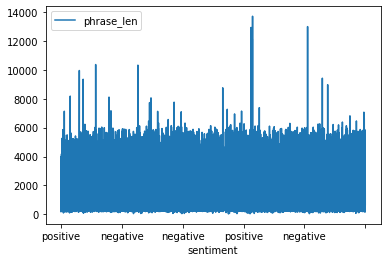

In [122]:
df.plot(x ='sentiment', y='phrase_len', kind = 'line')
plt.show()

In [123]:
sparce_mat = Tfidv.fit_transform(table)
save=sparce_mat
print(sparce_mat)

  (0, 64434)	0.055083572452237
  (0, 18045)	0.08959319266256778
  (0, 72271)	0.05667973604282478
  (0, 70931)	0.07337211489980938
  (0, 76496)	0.0496703403535203
  (0, 74138)	0.08484128727039111
  (0, 15180)	0.07785964166373498
  (0, 7387)	0.0454768992121768
  (0, 44626)	0.04464731480628633
  (0, 24405)	0.05446286789191354
  (0, 64997)	0.06859940948840237
  (0, 68060)	0.06249203409217008
  (0, 40058)	0.051820032069826674
  (0, 8528)	0.09294099346334374
  (0, 73406)	0.042358058427846186
  (0, 14343)	0.06087108311962792
  (0, 45971)	0.06236971158761109
  (0, 43835)	0.06820753445178705
  (0, 77836)	0.03027127048320069
  (0, 28799)	0.05596337375432707
  (0, 51253)	0.057823076814298734
  (0, 38886)	0.04552371851815443
  (0, 35665)	0.19883529646509232
  (0, 49366)	0.12304758793183235
  (0, 65941)	0.08455715328399305
  :	:
  (49999, 67285)	0.0804319328777451
  (49999, 48951)	0.08445891323486067
  (49999, 29718)	0.05153438625380271
  (49999, 8007)	0.06960477169476426
  (49999, 4134)	0.07774243

In [124]:
X_train, X_test, y_train, y_test = train_test_split(sparce_mat, df_new["sentiment"], test_size=0.3)
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
classification_report=classification_report(y_test,y_pred)
print(classification_report)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      7454
           1       0.75      0.84      0.79      7546

    accuracy                           0.78     15000
   macro avg       0.78      0.78      0.78     15000
weighted avg       0.78      0.78      0.78     15000

[[5321 2133]
 [1187 6359]]


In [125]:
sparce_mat1 = bow_vectorizer.fit_transform(table)
save=sparce_mat1
print(sparce_mat1)

  (0, 50979)	1
  (0, 59317)	1
  (0, 45532)	1
  (0, 77505)	3
  (0, 23513)	2
  (0, 41911)	3
  (0, 33587)	1
  (0, 59621)	2
  (0, 71122)	3
  (0, 24170)	1
  (0, 31648)	1
  (0, 45050)	1
  (0, 26071)	2
  (0, 71161)	1
  (0, 68209)	2
  (0, 10650)	1
  (0, 74561)	1
  (0, 61984)	1
  (0, 76651)	4
  (0, 63240)	1
  (0, 79050)	2
  (0, 73145)	1
  (0, 64186)	4
  (0, 24806)	1
  (0, 32215)	1
  :	:
  (49999, 33928)	1
  (49999, 73102)	1
  (49999, 13011)	1
  (49999, 61769)	1
  (49999, 39337)	1
  (49999, 74593)	1
  (49999, 40939)	1
  (49999, 35930)	1
  (49999, 5932)	1
  (49999, 31721)	1
  (49999, 58826)	1
  (49999, 34977)	1
  (49999, 5067)	1
  (49999, 72757)	1
  (49999, 39062)	1
  (49999, 66808)	1
  (49999, 44788)	1
  (49999, 16972)	1
  (49999, 11363)	1
  (49999, 49559)	1
  (49999, 47814)	1
  (49999, 13055)	1
  (49999, 29759)	1
  (49999, 58828)	1
  (49999, 79878)	1


In [126]:
X1_train, X1_test, y1_train, y1_test = train_test_split(sparce_mat1, df_new["sentiment"], test_size=0.3)

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X1_train,y1_train)
y1_pred=classifier.predict(X1_test)
from sklearn.metrics  import accuracy_score,classification_report

classification_report1=classification_report(y1_test,y1_pred)
print(classification_report1)
print(confusion_matrix(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      7574
           1       0.64      0.68      0.66      7426

    accuracy                           0.65     15000
   macro avg       0.65      0.65      0.65     15000
weighted avg       0.65      0.65      0.65     15000

[[4726 2848]
 [2364 5062]]


In [127]:
sentense =input("\nwrite your sentense \n")
df_s = pd.DataFrame(columns=['review','phrase_len','phrase_words'])
df_s.loc[0,"review"]= sentense
df_s = df_manip(df_s)
df_s=stopW(df_s)
revi=0                                                   #remove all word sghar 3la 2 chars
while revi<len(df_s):                                 #remove all word sghar 3la 2 chars
  text=rem_two_chars(df_s.loc[revi,"review"])     #remove all word sghar 3la 2 chars
  df_s.loc[revi, "review"]=text                       #remove all word sghar 3la 2 chars
  revi=revi+1
df_s=df_s.drop(['phrase_len'], axis = 1)            #remove th ecolumn
df_s=df_s.drop(['phrase_words'], axis = 1)   
df_new["sim"]= ""
# print(df_new)
df_new2=df_new
df_new3=df_new
df_s


write your sentense 
Caddyshack Two is a good movie by itself but compared to the original it cant stack up. Robert Stack is a horrible replacement for Ted Knight and Jackie Mason, while funny just cant compete with Rodney Dangerfield. Ty Webb is funny, being the only character from the original. Most of the other characters in the movie lack the punch of the original (Henry Wilcoxon for example) except for the hystericly funny lawyer Peter Blunt, being played by Randy Quaid. Every line he says reminds me of the originals humor, especially the scene at his office (I don't go in for law suits or motions. I find out where you live and come to your house and beat down your door with a f***ing baseball bat, make a bonfire with the chippindale,maybe roast that golden retriever (arff arff arff) then eat it. And then I'm comin' upstairs junior, and I'm grabbing you by your brooks brothers pjs, and cramming your brand new BMW up your tight a**! Do we have an understanding?). Offsetting his sm

,review
0,caddyshack two good movi compar origin cant s...


In [128]:
i=0
while i<len(table2):

  df_new2.loc[i,'sim']=cosine_sim2(df_new2.loc[i,'review'], df_s.loc[0,'review'])
  i=i+1
df_new2=df_new2.sort_values(by=['sim'])
df_new2=df_new2.drop(['sim'], axis = 1)          #remove th ecolumn  
df_new2=df_new2.drop(['sentiment'], axis = 1)          #remove th ecolumn  
print("using BOW 5 similaire sentensces")
print(df_new2.tail(5))


using BOW 5 similaire sentensces
                                                  review
41637   johnathan frake good actor direct famili film...
18594   *** warn thi review contain plot spoiler thou...
42946   've probabl heard bit new disney dub miyazaki...
31436   back mid/lat oav anim titl bubblegum crisi th...
70      caddyshack two good movi compar origin cant s...


In [129]:
i=0
tfidf_vectorizer = TfidfVectorizer()
print("using TFIDF 5 similaire sentensces")

while i<len(table3):
    
  tfidf_1= tfidf_vectorizer.fit_transform([df_new3.loc[i,'review']])
  tfidf_2= tfidf_vectorizer.transform([df_s.loc[0,'review']])

  df_new3.loc[i,'sim']=cosine_similarity(tfidf_1,tfidf_2)
  # df_new.loc[i,'sim']=cosine_sim2(df_new.loc[i,'review'], df_s.loc[0,'review'])
  i=i+1
df_new3=df_new3.sort_values(by=['sim'])
df_new3=df_new3.drop(['sim'], axis = 1)          #remove th ecolumn  
df_new3=df_new3.drop(['sentiment'], axis = 1)          #remove th ecolumn  
print(df_new3.tail(5))

using TFIDF 5 similaire sentensces
                                                  review
46810   movi great like stori prefer thi movi movi ce...
9429    thi movi far one worst b-movi ever seen plot ...
871     one remark sci-fi movi millennium onli movi i...
26790   good first movi good solid movi good car chas...
70      caddyshack two good movi compar origin cant s...


In [130]:
print("we can say that the tf idf is better then the bow whene we see the result and the score the precision and  the recall are little then the tfidf and if the recal and the precision are low means that the model makes lot of false nefative and positive \n Tfidf make a word ponderation from all the documents or all sentences but the bow makes a frequency of the the world only    ")    


we can say that the tf idf is better then the bow whene we see the result and the score the precision and  the recall are little then the tfidf and if the recal and the precision are low means that the model makes lot of false nefative and positive 
 Tfidf make a word ponderation from all the documents or all sentences but the bow makes a frequency of the the world only    


# New section